In [23]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from sklearn import preprocessing

In [26]:
loc=r'C:\Users\E2118\Documents\codevegechicken\statistic_hw6\hw6_1.xlsx'
df=pd.read_excel(loc)
mydata=df['bottle_strength']
mydata_nor=preprocessing.normalize([mydata])

## Histogram
再進行資料分布判別之前，先將資料視覺化，繪製成histogram之後，從形狀無法確切得知其是不是正常分布，且由於資料數量過少，無法單憑histogram判斷其分部狀態，因此還需要進行近一步分析。

C:\Users\E2118\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


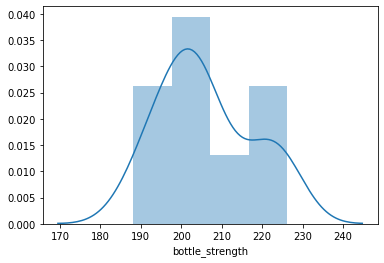

In [38]:
ax=sns.distplot(mydata,hist=True)

## Quantile-Quantile Plot
本組數據經過Quantile-Quantile plot之後，繪製出下面二圖，圖一是本題資料，圖二是理想的正常分布，
Quantile-Quantile Plot 的縱軸為資料值，橫軸為該筆資料點，為母資料中多少個四分點位置，若資料分布越接近紅線，表示本資料越接近正常分布。雖然相比istogram，qq plot，更能夠精準地表達該資料分布狀態，但是若要評估該筆資料與理想正常分布之間的偏差值是否可被接受，還要進行下一步分析。

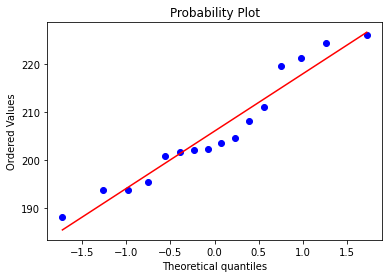

In [34]:
stats.probplot(mydata,dist="norm",plot=pylab)
pylab.show()

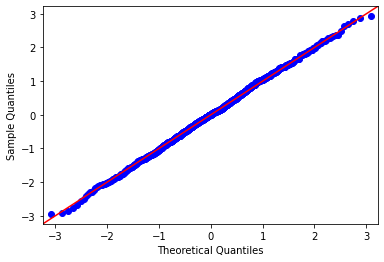

In [19]:
mydata1=norm.rvs(size=1000)
sm.qqplot(mydata1,line='45')
pylab.show()

### Shapiro-Wilk Test
當資料樣本數少於50時，可使用 Shapiro-Wilk Test ，並觀察檢測得到的 W 值，來判斷是否為常態分佈，其檢測之虛無假設 (H0)：本變項之樣本群為常態分佈。 因此如果 p <0.05，則推翻虛無假設，則資料不為常態分佈；如果是 p > 0.05，則接受虛無假設，表示為常態分佈

In [42]:
from scipy.stats import shapiro
stat, p=shapiro(mydata)
print('stats=%.3f, p=%.3f\n' % (stat,p))
if p>0.05:
    print("probably normal distribution")
else:
    print("probably not normal distribution")
    

stats=0.932, p=0.262

probably normal distribution


由 Shapiro-Wilk Test 得知 p值>0.05，因此該資料分布是正常分布